A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd

circles = pd.DataFrame({"x0" : x[:, 0], "x1" : x[:, 1], "label" : y})

circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### Visualise with a plot

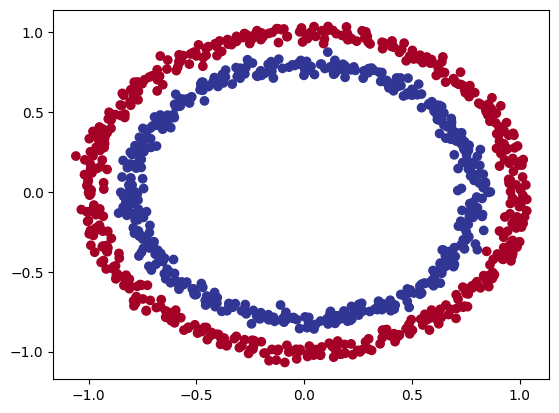

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.RdYlBu);

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling

* Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1))

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

model_1.fit(x, y, epochs = 5, verbose = 0)

In [ ]:
model_1.fit(x, y, epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

* Even after 200 passes of the data, it's still performing as if it's guessing.

* What if we added an extra layer and trained for a little longer?

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

model_2.fit(x, y, epochs = 5, verbose = 0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Improving our model

To improve our model, we can alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

model_3.fit(x, y, epochs = 100, verbose = 0)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5120


[0.6977987289428711, 0.5120000243186951]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


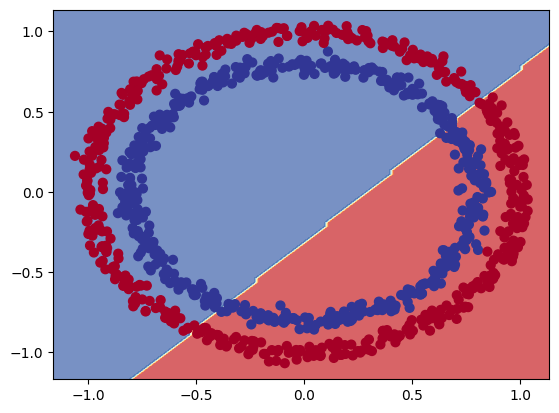

In [ ]:
plot_decision_boundary(
    model = model_3,
    X = x,
    y = y)

In [ ]:
tf.random.set_seed(42)

model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_reg.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

In [ ]:
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)
# y = x + 10

# Splitting into training and testing data
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_reg.fit(tf.expand_dims(x_reg_train, axis = -1),
            y_reg_train, epochs = 100, verbose = 0)

2/2 [==============================] - 0s 4ms/step


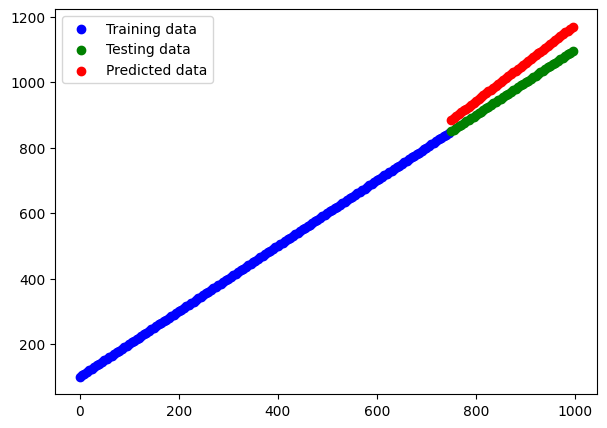

In [ ]:
y_reg_preds = model_reg.predict(x_reg_test)

plt.figure(figsize = (7, 5))

plt.scatter(x_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(x_reg_test, y_reg_test, c = "g", label = "Testing data")
plt.scatter(x_reg_test, y_reg_preds, c = "r", label = "Predicted data")
plt.legend()

### The missing piece: Non-linearity

* Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

* What about non-straight (non-linear) lines?

* If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear")
])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_4.fit(x, y, epochs = 100, verbose = 0)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


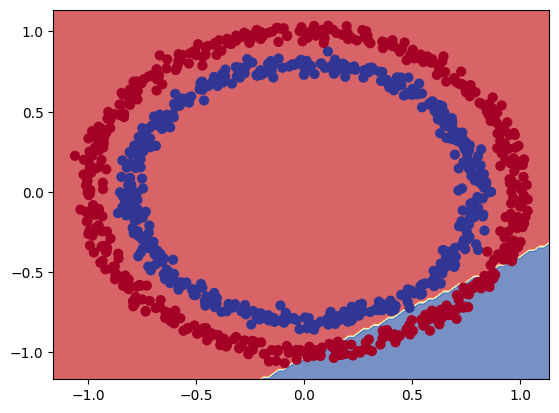

In [ ]:
# Check decision boundary for latest model

plot_decision_boundary(model = model_4,
                       X = x,
                       y = y);

* What we're going to have to do is add some non-linearity to our model.

* To do so, we'll use the activation parameter in on of our layers.

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu"),
    tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(x, y, epochs = 100, verbose = 0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


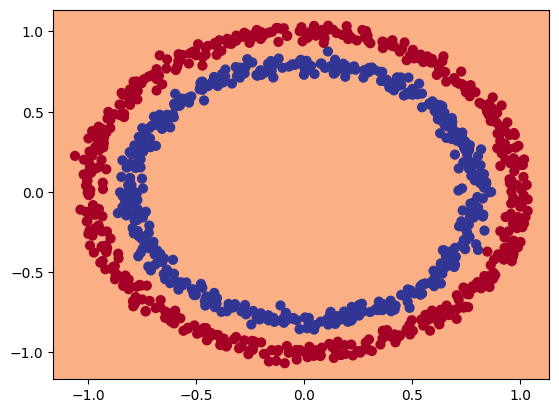

In [ ]:
# Check decision boundary for latest model

plot_decision_boundary(model = model_5,
                       X = x,
                       y = y);

### Replicate Multi - Layer NN from TF playground

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_6.fit(x, y, epochs = 250, verbose = 0)

In [ ]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9910


[0.03669552877545357, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


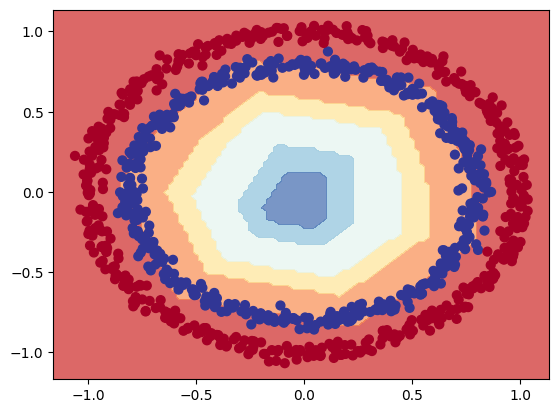

In [ ]:
plot_decision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)])

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_7.fit(x, y, epochs = 250, verbose = 0)

In [ ]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9950


[0.046824611723423004, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


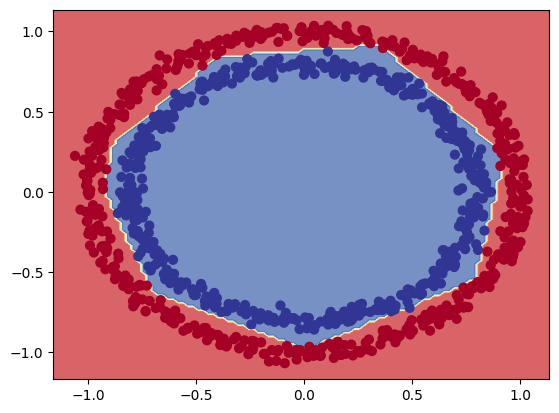

In [ ]:
plot_decision_boundary(model_7, x, y)

* Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

* To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Creating a toy dataset
a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Replicating the sigmoid function

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

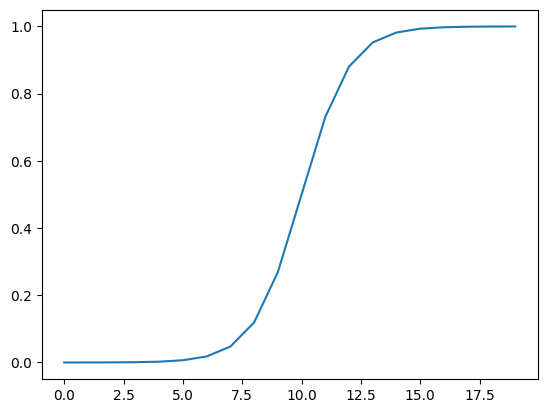

In [ ]:
plt.plot(sigmoid(a))

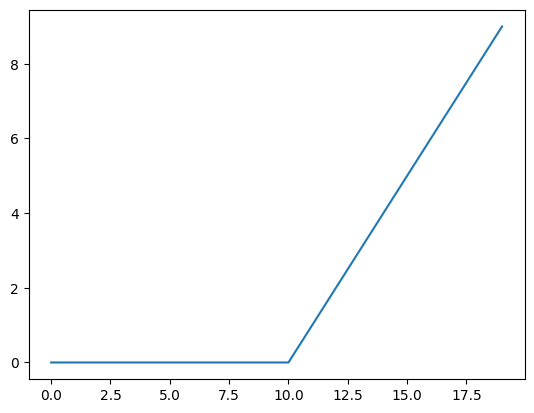

In [ ]:
# Replicating the ReLu function

def relu(x):
  return tf.math.maximum(x, 0)

plt.plot(relu(a))

### Evaluating and improving the model

In [ ]:
x_train , y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)])

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

history = model_8.fit(x_train, y_train, epochs = 25, verbose = 0)

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8800


[0.4043009877204895, 0.8799999952316284]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


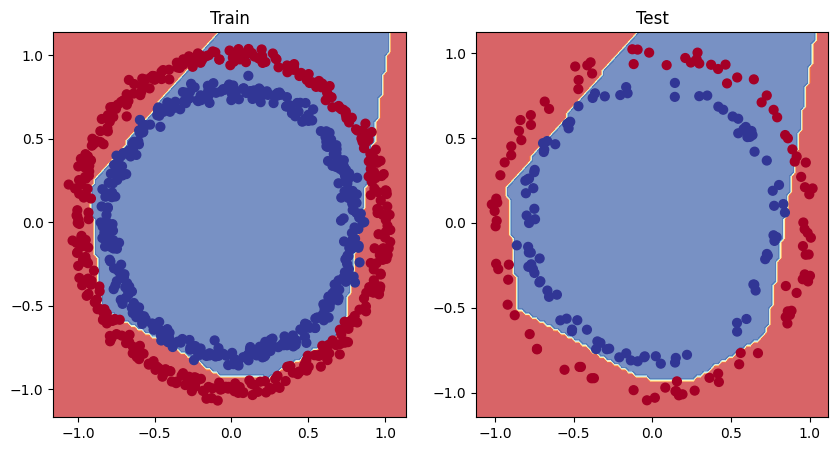

In [ ]:
# Plot decision boundary for training and testing sets

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)
plt.show()

### Using history object to plot Loss curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.697767,0.46250
1,0.690884,0.49125
2,0.686399,0.53250
3,0.682751,0.58625
4,0.678104,0.60125
5,0.673586,0.56750
6,0.665978,0.58250
7,0.662441,0.57750
8,0.655921,0.58625
9,0.649491,0.58750


Text(0.5, 1.0, 'Model_8 Loss Curves')

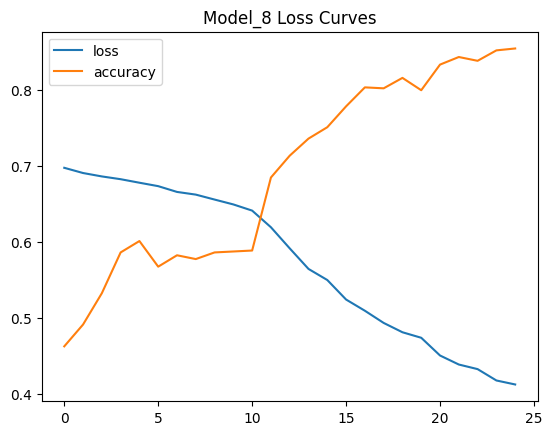

In [ ]:
# Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves")

### Finding the best Learning Rate

* That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A learning rate callback.
* You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Creating same model as model_8

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)])

model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Create a Learning Rate Callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 ** (epoch / 20))

history_9 = model_9.fit(x_train, y_train, epochs = 100,
                      callbacks = [lr_scheduler], verbose = 0)

<Axes: >

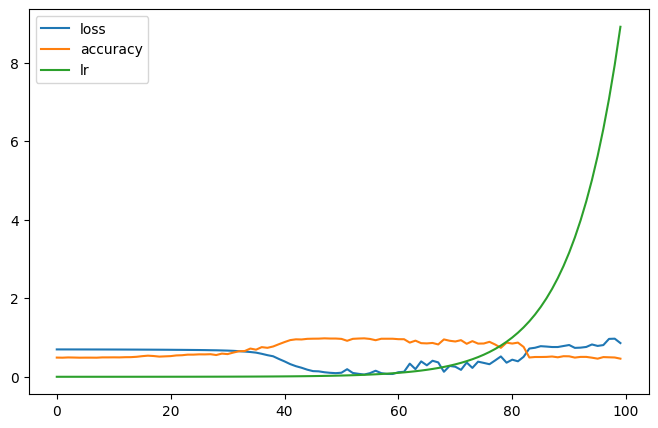

In [ ]:
pd.DataFrame(history_9.history).plot(figsize = (8, 5))

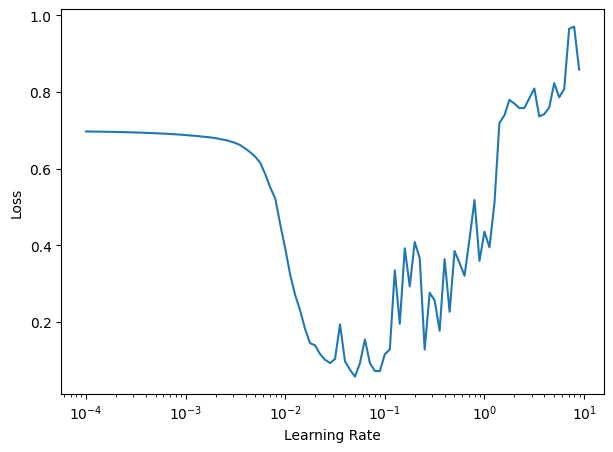

In [ ]:
# Plot the learning rate versus loss

lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
# lrs[:10]

plt.figure(figsize = (7, 5))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

### Multi Class Classification

* To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Checking the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

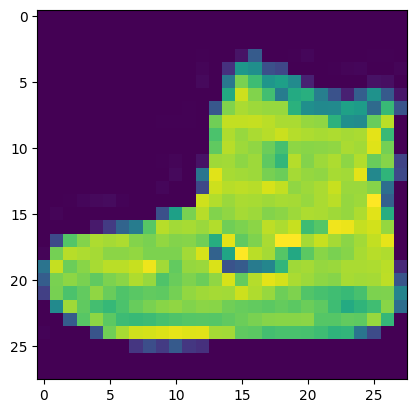

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

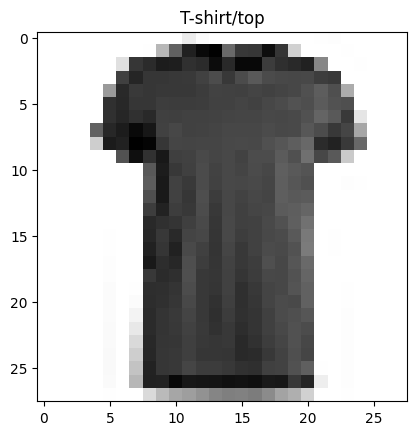

In [6]:
# Plot an example image and its label

index = 17
plt.imshow(train_data[index], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index]])

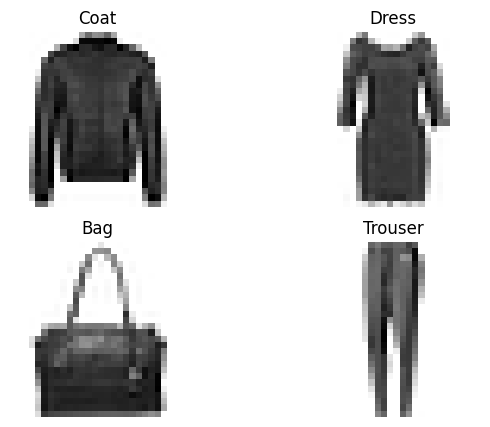

In [7]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a Multi Class Classification Model

* Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
* More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

# Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])


# Compile the model

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model

non_norm_history = model_11.fit(train_data, train_labels, epochs = 10,
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.3461 - accuracy: 0.0983 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy:

In [9]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
train_data.min(), train_data.max()

(0, 255)

* We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

* Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).

In [11]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [12]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm, train_labels, epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1129 - accuracy: 0.6001 - val_loss: 0.7948 - val_accuracy: 0.7212
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7276 - accuracy: 0.7470 - val_loss: 0.7173 - val_accuracy: 0.7389
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6568 - accuracy: 0.7745 - val_loss: 0.6610 - val_accuracy: 0.7688
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6197 - accuracy: 0.7882 - val_loss: 0.6339 - val_accuracy: 0.7847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5979 - accuracy: 0.7950 - val_loss: 0.6445 - val_accuracy: 0.7763
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5795 - accuracy: 0.8023 - val_loss: 0.6118 - val_accuracy: 0.7902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5699 - accuracy: 0.8053 - val_loss: 0.6301 - val_accuracy:

<Axes: title={'center': 'Normalised data'}>

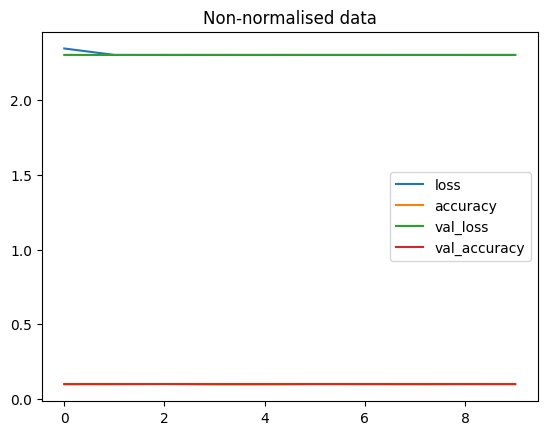

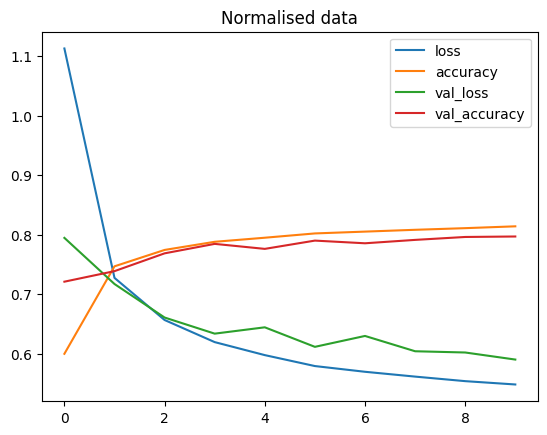

In [13]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title = "Non-normalised data")

pd.DataFrame(norm_history.history).plot(title = "Normalised data")

* Finding the ideal learning rate

In [14]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-3 * 10 ** (epochs / 20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs = 40, verbose = 0,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Text(0, 0.5, 'Loss')

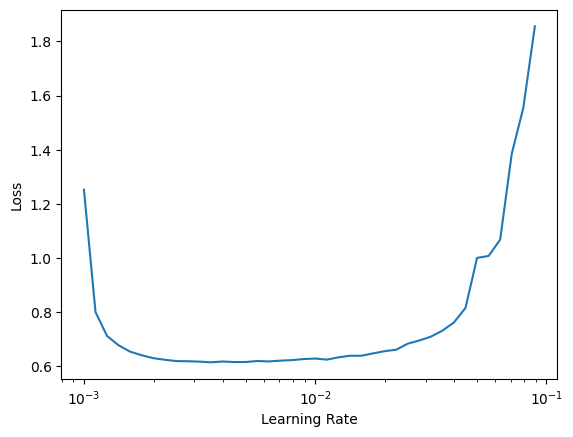

In [15]:
# Plot the Learning Rate decay curve
import pandas as pd
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/ 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [16]:
# Refit the model with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

history_14 = model_14.fit(train_data_norm, train_labels, epochs = 20, verbose = 0,
                               validation_data = (test_data_norm, test_labels))

In [17]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[3.5332150e-08, 9.9600597e-12, 2.4709629e-10, 5.8455100e-08,
        1.0331315e-07, 8.4076777e-02, 3.1992332e-07, 1.4251585e-01,
        3.7523929e-04, 7.7303159e-01],
       [2.3369792e-06, 1.2054933e-10, 8.7666243e-01, 1.6636507e-08,
        1.1244868e-01, 2.3356154e-36, 1.0886512e-02, 0.0000000e+00,
        1.6466467e-09, 0.0000000e+00],
       [2.1657411e-03, 9.9768424e-01, 2.5381305e-06, 8.1653770e-06,
        6.4267972e-08, 3.1495617e-06, 9.9650693e-05, 5.7081989e-20,
        3.6490164e-05, 1.7085820e-24],
       [2.2259163e-02, 9.7261775e-01, 1.7302246e-04, 1.7025108e-03,
        1.5184655e-05, 7.3752541e-05, 2.6506919e-03, 7.7494799e-15,
        5.0794682e-04, 6.0851103e-18],
       [1.1387824e-01, 8.6866552e-03, 3.1944704e-01, 2.5142996e-02,
        6.8860576e-02, 4.8393251e-12, 4.6290120e-01, 2.6393002e-33,
        1.0831702e-03, 1.3492042e-28]], dtype=float32)

In [18]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [19]:
# Convert all of prediction probs into integers
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[645,   3,  19, 137,   8,   1, 171,   0,  16,   0],
       [ 19, 894,   2,  70,   2,   1,  11,   0,   1,   0],
       [ 14,   0, 539,  25, 231,   0, 186,   0,   5,   0],
       [ 19,  10,  12, 871,  51,   1,  30,   0,   6,   0],
       [  1,   0,  58,  48, 775,   0, 106,   0,  12,   0],
       [  0,   0,   0,   3,   0, 876,   0,  58,   8,  55],
       [ 87,   0,  70, 100, 192,   0, 526,   0,  25,   0],
       [  0,   0,   0,   0,   0,  36,   0, 897,   0,  67],
       [  2,   0,   1,  16,   6,  15,  45,   3, 910,   2],
       [  0,   0,   0,   0,   0,  18,   0,  39,   2, 941]])

Let's create a function to plot a random image along with its prediction.

* 🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [21]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image and plots it, labels it with a prediction and truth label
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the colour based on right / wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add x label
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100 * tf.reduce_max(pred_probs),
                                                   true_label), color = color)

1/1 [==============================] - 0s 60ms/step


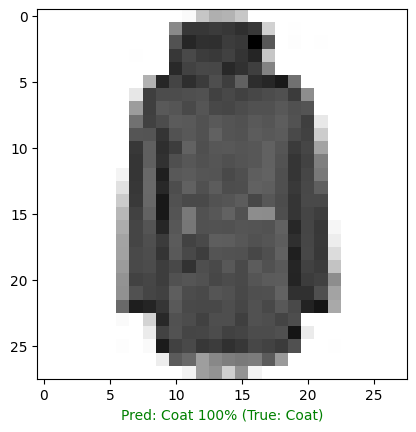

In [22]:
# Check out a random image

plot_random_image(model = model_14,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_names)

### What patterns is our model learning ?

In [23]:
model_14.layers

In [24]:
# Extract a particular layer
model_14.layers[1]

In [25]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.06649353, -0.5747006 , -0.0725705 ,  0.41257808],
        [ 0.07171698, -0.10957169, -0.71596026,  0.72515124],
        [-0.0686229 , -0.04792151, -0.72145385,  1.14      ],
        ...,
        [ 0.04088468, -0.04604717, -0.05321768, -0.10526328],
        [ 0.00545707, -0.22344266,  0.3008626 , -0.33705214],
        [ 0.08016485, -0.34103775,  0.11180021,  0.17953889]],
       dtype=float32),
 (784, 4))

In [26]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
biases, biases.shape

(array([-0.01834021,  1.4330922 ,  1.3352455 ,  2.399073  ], dtype=float32),
 (4,))

* The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

* Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

* Every neuron has a bias vector. Each of these is paired with a weight matrix.

* The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

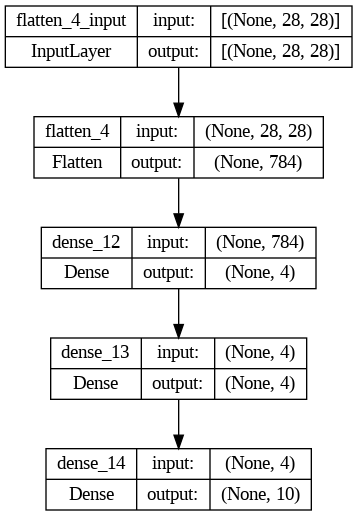

In [28]:
# Another way of viewing deep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes = True)